In [41]:
import pandas as pd

# reading in CSV 
betes = pd.read_csv("/Users/ayshaallahverdi/Desktop/diabetic_data.csv")

betes.head()

betes = betes.drop(['payer_code', 'patient_nbr', 'discharge_disposition_id', 'patient_nbr', 'encounter_id'], axis=1)


**EDA**

In [42]:
betes.dtypes.to_string


<bound method Series.to_string of race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
admission_source_id          int64
time_in_hospital             int64
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide            

In [43]:
import numpy as np

betes.replace('?', np.nan, inplace=True)

perc_missing_per_ftr = betes.isnull().sum() / len(betes)

missing_features = perc_missing_per_ftr[perc_missing_per_ftr > 0]

print('Fraction of missing values in features:')
print(missing_features)

print(betes.shape)

Fraction of missing values in features:
race                 0.022336
weight               0.968585
medical_specialty    0.490822
diag_1               0.000206
diag_2               0.003518
diag_3               0.013983
max_glu_serum        0.947468
A1Cresult            0.832773
dtype: float64
(101766, 46)


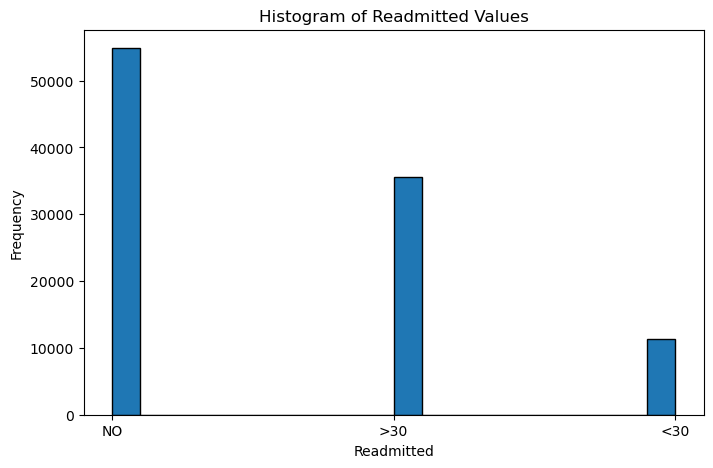

In [44]:
import matplotlib.pyplot as plt

readmitted_values = betes['readmitted']

plt.figure(figsize=(8, 5))
plt.hist(readmitted_values, bins=20, edgecolor='k')
plt.xlabel('Readmitted')
plt.ylabel('Frequency')
plt.title('Histogram of Readmitted Values')
plt.show()

In [49]:
betes["readmitted"].value_counts()

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

This shows the distribution of observations between readmittance rates - no means no readmittance, >30 means readmitted for more than 30 days, and <30 means readmitted for less than 30 days. 

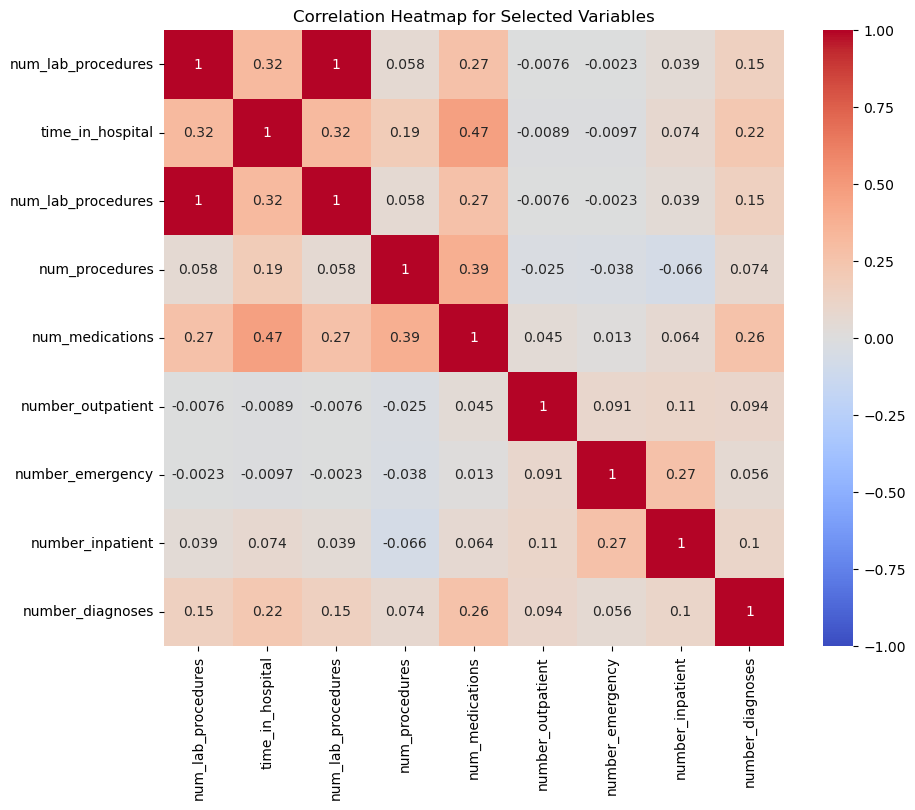

In [45]:
import seaborn as sns

vars = ['num_lab_procedures', 'time_in_hospital', 'num_lab_procedures',
                        'num_procedures', 'num_medications', 'number_outpatient',
                        'number_emergency', 'number_inpatient', 'number_diagnoses']

vars_for_corr = betes[vars]

correlation_matrix = vars_for_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap for Selected Variables")
plt.show()

Heatmap for numeric medical history variables to see if there are correlations within those who have the perliminary diabetes diagnosis. 

<Figure size 1000x600 with 0 Axes>

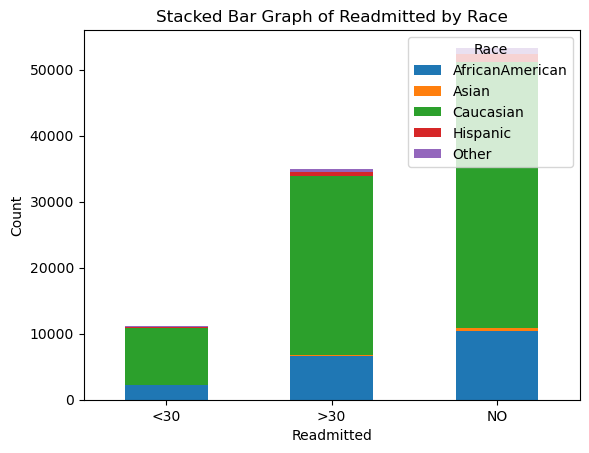

race
Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

In [51]:
contingency_table = pd.crosstab(betes['readmitted'], betes['race'])

plt.figure(figsize=(10, 6))
contingency_table.plot(kind='bar', stacked=True)
plt.xlabel('Readmitted')
plt.ylabel('Count')
plt.title('Stacked Bar Graph of Readmitted by Race')
plt.legend(title='Race', loc='upper right')
plt.xticks(rotation=0)
plt.show()

betes["race"].value_counts()

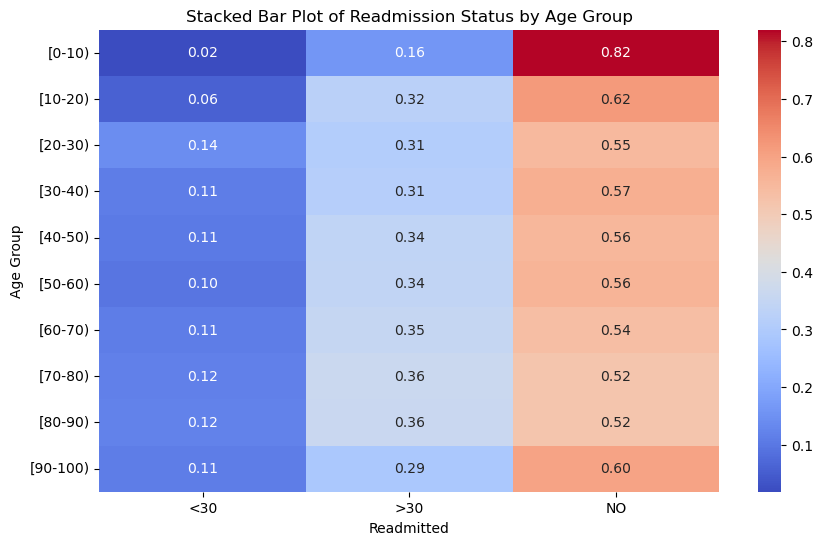

In [20]:
# You can replace 'df' with your actual DataFrame and column names

# Create a crosstab to get the count of readmitted cases by age group
cross_tab = pd.crosstab(betes['age'], betes['readmitted'])

# Normalize the counts to get proportions
cross_tab = cross_tab.div(cross_tab.sum(1), axis=0)

# Create the stacked bar plot
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt=".2f", cmap="plasma")

# Add labels and a title
plt.xlabel('Readmitted')
plt.ylabel('Age Group')
plt.title('Stacked Bar Plot of Readmission Status by Age Group')

# Show the plot
plt.show()


<Figure size 1000x600 with 0 Axes>

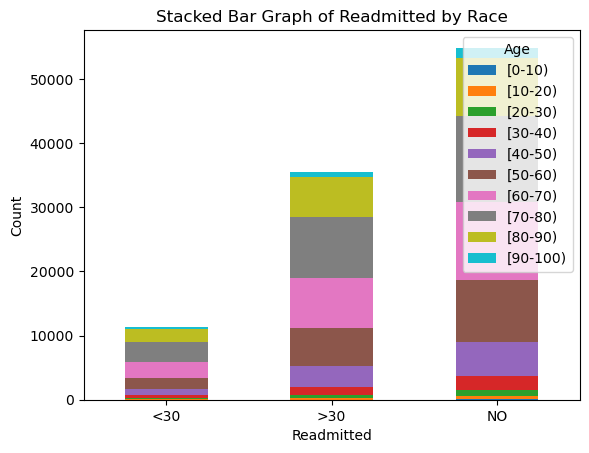

race
Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

In [17]:
contingency_table = pd.crosstab(betes['readmitted'], betes['age'])

plt.figure(figsize=(10, 6))
contingency_table.plot(kind='bar', stacked=True)
plt.xlabel('Readmitted')
plt.ylabel('Count')
plt.title('Stacked Bar Graph of Readmitted by Race')
plt.legend(title='Age', loc='upper right')
plt.xticks(rotation=0)
plt.show()

betes["race"].value_counts()

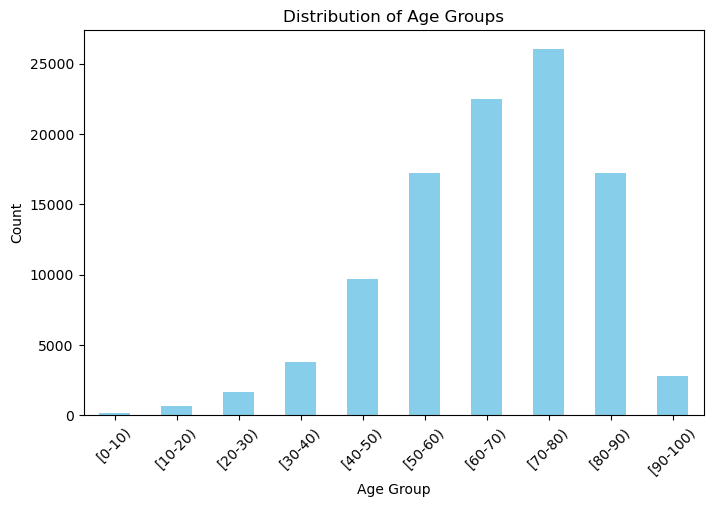

In [9]:
age_order = [
    '[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)',
    '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)'
]

plt.figure(figsize=(8, 5))
betes['age'].value_counts().loc[age_order].plot(kind='bar', color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Age Groups')
plt.xticks(rotation=45) 
plt.show()

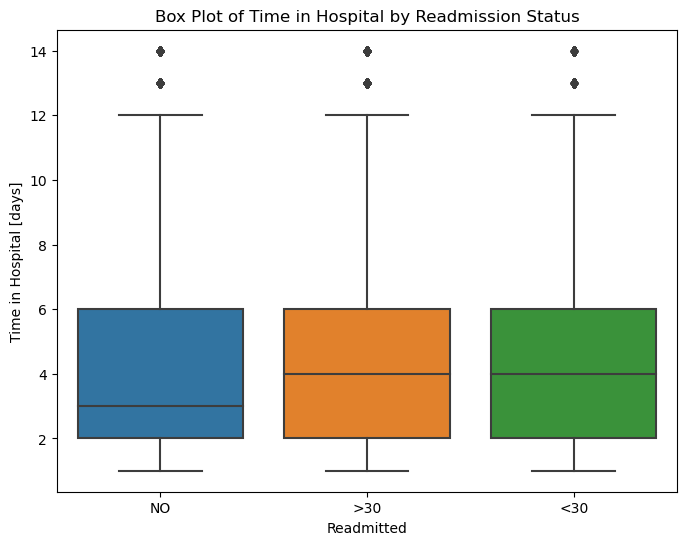

In [56]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='readmitted', y='time_in_hospital', data=betes)

# Add labels and a title
plt.xlabel('Readmitted')
plt.ylabel('Time in Hospital [days]')
plt.title('Box Plot of Time in Hospital by Readmission Status')

# Show the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

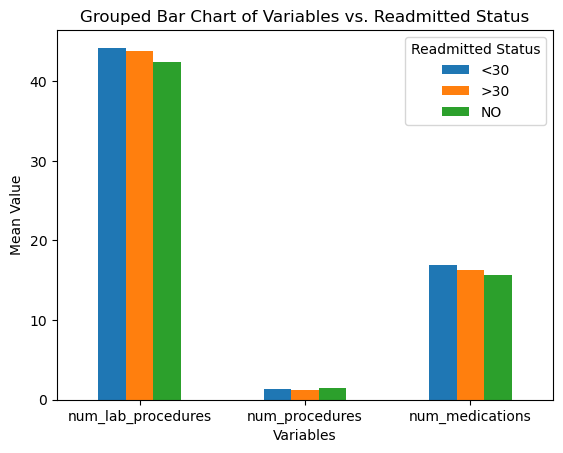

In [54]:
selected_columns = ['num_lab_procedures', 'num_procedures', 'num_medications', 'readmitted']

# Create a DataFrame with the selected columns
data = betes[selected_columns]

# Group the data by 'readmitted' and calculate the mean for each group
grouped_data = data.groupby('readmitted').mean()

# Transpose the grouped data for easy plotting
grouped_data = grouped_data.T

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the grouped bar chart
grouped_data.plot(kind='bar', rot=0)
plt.title('Grouped Bar Chart of Variables vs. Readmitted Status')
plt.xlabel('Variables')
plt.ylabel('Mean Value')
plt.legend(title='Readmitted Status')

# Show the plot
plt.show()

In [27]:
betes.shape

(101766, 48)

**SPLITTING**

In [10]:
from sklearn.model_selection import train_test_split

X = betes.drop(columns=["readmitted"])
y = betes["readmitted"]

X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,stratify=y,random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,stratify=y_other,random_state=42)
print('**balance with stratification:**')
# very little variation (in the 4th decimal point only) which is important if the problem is imbalanced
print(np.unique(y_train,return_counts=True))
print(np.unique(y_val,return_counts=True))
print(np.unique(y_test,return_counts=True))

**balance with stratification:**
(array(['<30', '>30', 'NO'], dtype=object), array([ 6814, 21327, 32918]))
(array(['<30', '>30', 'NO'], dtype=object), array([ 2271,  7109, 10973]))
(array(['<30', '>30', 'NO'], dtype=object), array([ 2272,  7109, 10973]))


MIGHT WANT TO DO STRATIFIEDKFOLD 

**PRE-PROCESSING**

In [ ]:
# ordinal_ftrs = ['age', 'weight'] 
# ordinal_cats = {'age': ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)',
#     '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)'],
#     'weight': ['[0-25)', '[25-50)', '[50-75)', '[75-100)', '[100-125)',
#        '[125-150)', '[150-175)', '[175-200)',  '>200']
# }


# preprocessor = ColumnTransformer(
#     transformers=[
#         ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
#         ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
#         ('std', StandardScaler(), std_ftrs)])

# clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
#                                                        # later on we will add other steps here

# X_train_prep = clf.fit_transform(X_train)
# X_val_prep = clf.transform(X_val)
# X_test_prep = clf.transform(X_test)

In [ ]:
imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
data['column_with_nans'] = imputer.fit_transform(data[['column_with_nans']])

In [47]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer


# ordinal variables 

# initialize the encoder
ordinal_ftrs = ['age', 'weight'] 
# ordinal_cats = {'age': ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)',
#     '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)'],
#     'weight': ['[0-25)', '[25-50)', '[50-75)', '[75-100)', '[100-125)',
#        '[125-150)', '[150-175)', '[175-200)',  '>200']
# }
categories_age = ['NA', '[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']
categories_weight = ['NA', '[0-25)', '[25-50)', '[50-75)', '[75-100)', '[100-125)', '[125-150)', '[150-175)', '[175-200)', '>200']

onehot_ftrs = ['race','gender','admission_type_id',
            'admission_source_id','medical_specialty','diag_1', 'diag_2', 'diag_3', 
            'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
            'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone',
            'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
            'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
            'diabetesMed'
            ]

std_ftrs = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient',
            'number_emergency', 'number_inpatient', 'number_diagnoses',             
            ]

ordinal_transformer = Pipeline(steps=[
    ('imputer2', SimpleImputer(strategy='constant',fill_value='NA')),
    ('ordinal', OrdinalEncoder(categories = [categories_age, categories_weight]))])

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_transformer, ordinal_ftrs),

        # ('ord', OrdinalEncoder(categories =[categories_age, categories_weight]), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)])
# enc = OrdinalEncoder(categories = ordinal_cats)   # By default, the categories are alphabetically ordered
#                                                     # which is NOT what you want usually.


clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)
# # fit the training data
# enc.fit(X_train[ordinal_ftrs])  # the encoder expects a 2D array, that's why the column name is in a list

# # transform X_train. We could use enc.fit_transform(X_train) to combine fit and transform
# ordinal_train = enc.transform(X_train[ordinal_ftrs])
# print('transformed train features:')
# print(ordinal_train)
# # transform X_val
# ordinal_val = enc.transform(X_val[ordinal_ftrs])
# print('transformed validation features:')
# print(ordinal_val)
# # transform X_test
# ordinal_test = enc.transform(X_test[ordinal_ftrs])
# print('transformed test features:')
# print(ordinal_test)

/Users/ayshaallahverdi/miniconda3/envs/data1030/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(61059, 47)
(61059, 2270)
[[ 8.          0.          0.         ... -0.225931   -0.49976092
   0.30105485]
 [ 9.          0.          0.         ... -0.225931    0.28715182
   0.30105485]
 [ 8.          0.          0.         ... -0.225931   -0.49976092
   0.81935712]
 ...
 [ 6.          0.          0.         ... -0.225931   -0.49976092
  -2.29045649]
 [ 8.          0.          0.         ... -0.225931   -0.49976092
   0.81935712]
 [ 9.          0.          1.         ...  2.09765346 -0.49976092
  -1.77215422]]


In [29]:
#categorical variables 

# from sklearn.preprocessing import OneHotEncoder

# # let's collect all categorical features first
# onehot_ftrs = ['race','gender','admission_type_id','discharge_disposition_id',
#             'admission_source_id','medical_specialty','diag_1', 'diag_2', 'diag_3', 
#             'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
#             'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone',
#             'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
#             'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change',
#             'diabetesMed'
#             ]
# # initialize the encoder
# enc = OneHotEncoder(sparse=False,handle_unknown='ignore') # by default, OneHotEncoder returns a sparse matrix. sparse=False returns a 2D array
# # fit the training data
# enc.fit(X_train[onehot_ftrs])
# print('feature names:',enc.get_feature_names_out(onehot_ftrs))
# print(len(enc.get_feature_names_out(onehot_ftrs)))


feature names: ['race_AfricanAmerican' 'race_Asian' 'race_Caucasian' ... 'change_No'
 'diabetesMed_No' 'diabetesMed_Yes']
2286


/Users/ayshaallahverdi/miniconda3/envs/data1030/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [30]:
# # transform X_train
# onehot_train = enc.transform(X_train[onehot_ftrs])
# print('transformed train features:')
# print(onehot_train)
# # transform X_val
# onehot_val = enc.transform(X_val[onehot_ftrs])
# print('transformed val features:')
# print(onehot_val)
# # transform X_test
# onehot_test = enc.transform(X_test[onehot_ftrs])
# print('transformed test features:')
# print(onehot_test)

transformed train features:
[[0. 0. 1. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 1. ... 1. 0. 1.]
 ...
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]]
transformed val features:
[[0. 0. 1. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 1. 0. 1.]
 ...
 [0. 0. 1. ... 1. 1. 0.]
 [0. 0. 1. ... 1. 1. 0.]
 [1. 0. 0. ... 1. 0. 1.]]
transformed test features:
[[0. 0. 1. ... 0. 0. 1.]
 [0. 0. 1. ... 1. 1. 0.]
 [0. 0. 1. ... 1. 1. 0.]
 ...
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 1. ... 1. 0. 1.]]


In [31]:
# # continuous 

# from sklearn.preprocessing import StandardScaler


# std_ftrs = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient',
#             'number_emergency', 'number_inpatient', 'number_diagnoses',             
#             ]
# scaler = StandardScaler()
# print(scaler.fit_transform(X_train[std_ftrs]))
# print(scaler.transform(X_val[std_ftrs]))
# print(scaler.transform(X_test[std_ftrs]))

ValueError: could not convert string to float: '[75-100)'